In [ ]:
##This code is for comparing minimisation performance of SGD and convex formulation in random setting
##Visualisation -> box plot
##regression (squared loss), random design
##Run for multiple independent trials

##Convex formulation based on the idea from the paper
## "Neural Networks are Convex Regularizers: Exact Polynomial-time Convex Optimization Formulations for Two-layer Networks"
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import torch

In [ ]:
def relu(x):
    return np.maximum(0,x)
def drelu(x):
    return x>=0

d=2 # dimension of the data
beta=1e-3 # regularization parameter

# Adjust variables for each experiment (Both Convex Formulation and SGD)
num_trials=50 # number of independent trials
n=30 # number of random samples to be collected

#Adjust variables for each experiment (SGD)
m=5 # number of neurons
num_epochs = 6000 # number of iterations for SGD

learning_rate = 0.01

In [ ]:
# Store minimised values for each trial
all_min=[]

In [ ]:
# Track the minimised values for plotting

for trial in range(num_trials):
    # Set random seed for reproducibility
    torch.manual_seed(2025+trial)
    np.random.seed(2025+trial)
    X = torch.rand(n, 2) * 10 - 5 # Random 2D input in range [-5, 5)
    # Create Y based on the first element of each row in X
    Y = torch.where(X[:, 0] > X[:,1], torch.tensor(1), torch.tensor(-1))
    X=X.numpy()
    Y=Y.numpy()

    # Matrix to store hyperplane arrangements for X
    dmat=np.empty((n,0))
    # Finite approximation of all possible sign patterns
    for i in range(int(1e5)):
        u=np.random.randn(d,1)
        # u is a 2D array of shape (d, 1) filled with random floats sampled from a standard normal distribution (mean = 0, standard deviation = 1)
        dmat=np.append(dmat,drelu(np.dot(X,u)),axis=1)
        # The function appends the result of drelu(np.dot(X, u)) as a new column to the right of the dmat array.

    dmat=(np.unique(dmat,axis=1))
    m1=dmat.shape[1] #number of columns in dmat

    # Uopt1 and Uopt2 to represent parameters to be optimised
    Uopt1=cp.Variable((d,m1))
    Uopt2=cp.Variable((d,m1))

    # yopt1 and yopt2 to represent a fixed vector DXv and DXt
    yopt1=cp.Parameter((n,1))
    yopt2=cp.Parameter((n,1))
    yopt1=cp.sum(cp.multiply(dmat,(X*Uopt1)),axis=1)
    yopt2=cp.sum(cp.multiply(dmat,(X*Uopt2)),axis=1)

    # We use MSE+regularization term as a performance metric
    cost=cp.sum((Y - (yopt1 - yopt2))**2)/n + (beta/2)*(cp.norm(Uopt1, 'fro')**2 + cp.norm(Uopt2, 'fro')**2)
    # Add constraints
    constraints=[]
    constraints+=[cp.multiply((2*dmat-np.ones((n,m1))),(X*Uopt1))>=0]
    constraints+=[cp.multiply((2*dmat-np.ones((n,m1))),(X*Uopt2))>=0]

    # Solve convex program
    prob=cp.Problem(cp.Minimize(cost),constraints)
    prob.solve()
    cvx_opt=prob.value
    print(f"Trial {trial+1}: Convex Formulation Objective Value: {cvx_opt}")

    # Store minimised value
    all_min.append(cvx_opt)

/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 321 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 322 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 1: Convex Formulation Objective Value: 0.10246708209050617


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 325 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 326 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 2: Convex Formulation Objective Value: 0.03484889938814477


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 329 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 330 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 3: Convex Formulation Objective Value: 0.0873810676842291


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 333 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 334 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 4: Convex Formulation Objective Value: 0.12539818061910657


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 337 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 338 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 5: Convex Formulation Objective Value: 0.08140090976032202


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 341 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 342 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 6: Convex Formulation Objective Value: 0.16775019081593476


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 345 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 346 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 7: Convex Formulation Objective Value: 0.08404153066830537


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 349 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 350 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 8: Convex Formulation Objective Value: 0.15770457562366855


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 353 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 354 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 9: Convex Formulation Objective Value: 0.12598637473080804


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 357 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 358 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 10: Convex Formulation Objective Value: 0.07899725596597279


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 361 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 362 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 11: Convex Formulation Objective Value: 0.05739118933867949


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 365 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 366 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 12: Convex Formulation Objective Value: 0.14624771137706988


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 369 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 370 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 13: Convex Formulation Objective Value: 0.12076424130113006


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 373 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 374 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 14: Convex Formulation Objective Value: 0.06542110017963465


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 377 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 378 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 15: Convex Formulation Objective Value: 0.16634281756776725


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 381 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 382 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 16: Convex Formulation Objective Value: 0.06792263492436887


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 385 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 386 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 17: Convex Formulation Objective Value: 0.07354105494469793


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 389 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 390 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 18: Convex Formulation Objective Value: 0.14091546077644718


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 393 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 394 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 19: Convex Formulation Objective Value: 0.08412735054668118


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 397 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 398 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 20: Convex Formulation Objective Value: 0.16211055341842398


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 401 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 402 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 21: Convex Formulation Objective Value: 0.1547709746087107


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 405 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 406 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 22: Convex Formulation Objective Value: 0.053060320927803065


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 409 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 410 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 23: Convex Formulation Objective Value: 0.14679518449335208


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 413 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 414 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 24: Convex Formulation Objective Value: 0.06031341726252823


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 417 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 418 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 25: Convex Formulation Objective Value: 0.09115732153680027


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 421 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 422 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 26: Convex Formulation Objective Value: 0.0948262196015584


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 425 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 426 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 27: Convex Formulation Objective Value: 0.08280050902486383


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 429 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 430 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 28: Convex Formulation Objective Value: 0.10881195578243814


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 433 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 434 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 29: Convex Formulation Objective Value: 0.07005992610205963


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 437 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 438 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 30: Convex Formulation Objective Value: 0.0980857115034552


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 441 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 442 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 31: Convex Formulation Objective Value: 0.10787721460003218


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 445 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 446 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 32: Convex Formulation Objective Value: 0.09622774721637209


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 449 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 450 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 33: Convex Formulation Objective Value: 0.09592965911125581


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 453 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 454 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 34: Convex Formulation Objective Value: 0.04600472878077573


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 457 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 458 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 35: Convex Formulation Objective Value: 0.134109201469484


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 461 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 462 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 36: Convex Formulation Objective Value: 0.1121401836474401


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 465 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 466 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 37: Convex Formulation Objective Value: 0.08862912684120083


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 469 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 470 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 38: Convex Formulation Objective Value: 0.056428368219003246


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 473 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 474 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 39: Convex Formulation Objective Value: 0.09532482933228056


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 477 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 478 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 40: Convex Formulation Objective Value: 0.19546799723950803


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 481 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 482 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 41: Convex Formulation Objective Value: 0.12383427581903961


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 485 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 486 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 42: Convex Formulation Objective Value: 0.061493274404295604


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 489 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 490 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 43: Convex Formulation Objective Value: 0.08389297978369098


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 493 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 494 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 44: Convex Formulation Objective Value: 0.18289382478658645


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 497 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 498 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 45: Convex Formulation Objective Value: 0.11661027990595513


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 501 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 502 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 46: Convex Formulation Objective Value: 0.10020760799280214


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 505 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 506 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 47: Convex Formulation Objective Value: 0.07191413991538131


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 509 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 510 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 48: Convex Formulation Objective Value: 0.03819879430347292


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 513 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 514 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 49: Convex Formulation Objective Value: 0.1177591058517623
Trial 50: Convex Formulation Objective Value: 0.15491173834107075


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 517 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 518 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

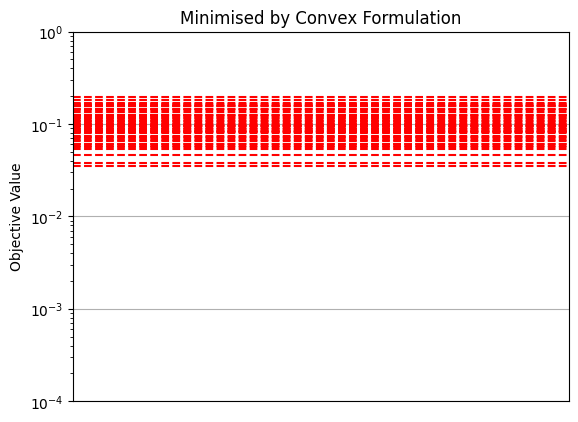

In [ ]:
# Plot the log of minimized values
fig, ax = plt.subplots() # Create a figure and axes object

for trial in range(num_trials):
    ax.axhline(y=all_min[trial], linestyle='--', color='r')

ax.set_ylim(bottom=1e-4, top=1)
ax.set_ylabel('Objective Value')
ax.set_title(f'Minimised by Convex Formulation')
ax.set_xticks([])

ax.grid(True)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

plt.show()

In [ ]:
##2-layer ReLU with weight decay
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Define the Neural Network model with 2 layers
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim, bias=False)  # First layer
        self.layer2 = nn.Linear(hidden_dim, output_dim, bias=False)  # Second layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # ReLU activation function applied after the first layer
        x = self.layer2(x)  # Output layer (no activation)
        return x

In [ ]:
# Set dimensions
input_dim = 2   # 2D input
hidden_dim = m  # Hidden layer dimension
output_dim = 1  # 1D output (binary classification)

In [ ]:
# Define Mean Squared Error (MSE) loss and add weight decay (L2 regularization)
criterion = nn.MSELoss()

In [ ]:
# Store losses over the learning process for each trial
all_losses = []
#Store minimised values after the whole process of SGD learning
all_min_SGD = []

In [ ]:
# Track the loss values for plotting

for trial in range(num_trials):
    # Set random seed for reproducibility
    torch.manual_seed(trial)
    np.random.seed(trial)
    # Generate random dataset with n samples
    X = torch.rand(n, 2) * 10 - 5 # Random 2D input in range [-5, 5) times [-5, 5)
    # Create Y based on the first element of each row in X
    Y = torch.where(X[:, 0] > X[:,1], torch.tensor(1), torch.tensor(-1))
    X = X.float()
    Y = Y.float()

    # Initialize model and optimizer
    model = SimpleNN(input_dim, hidden_dim, output_dim)
    # Using SGD optimizer with weight decay
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=beta)  # weight_decay is the L2 penalty
    # Training loop
    trial_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        trial_losses.append(loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()))
        # Optionally print loss every 100 epochs
        if (epoch + 1) % num_epochs == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()):.4f}')
          #Store minimised values after the whole process of SGD learning
          all_min_SGD.append(loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()))

    all_losses.append(trial_losses)

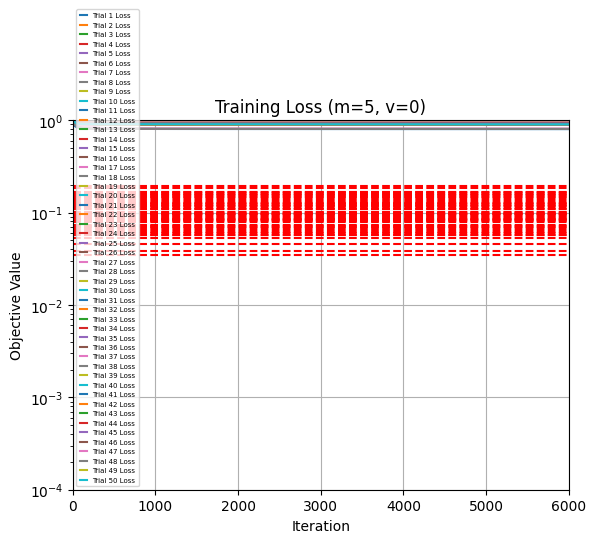

In [ ]:
# Plot the log of trial loss over the number of epochs
fig, ax = plt.subplots() # Create a figure and axes object

for trial in range(num_trials):
    ax.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-') # Plot on the axes object
    # Plot a horizontal line indicating the optimal value
    ax.axhline(y=all_min[trial], color='r', linestyle='--')
ax.set_ylim(bottom=1e-4, top=1)
ax.set_xlim(left=0, right=num_epochs)
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Value')
ax.set_title(f'Training Loss (m={m}, v=0)')

ax.grid(True)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Display the legend
ax.legend(loc='lower left',prop={'size': 5}, borderpad=0.5, handlelength=1, handleheight=0.5)


plt.show()

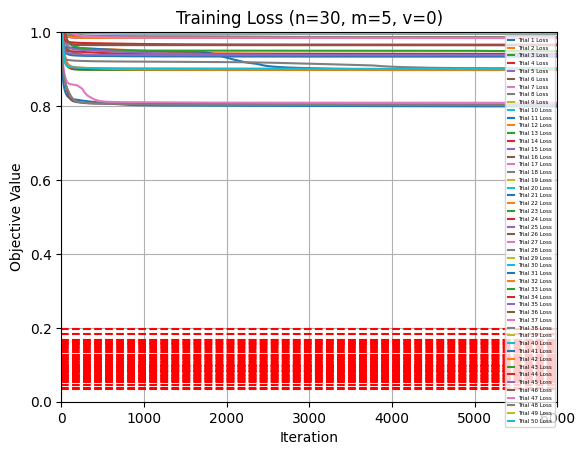

In [ ]:
# Plot the loss over the number of epochs
for trial in range(num_trials):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
    plt.axhline(y=all_min[trial], color='r', linestyle='--')

plt.ylim(bottom=0, top=1)
plt.xlim(left=0, right=num_epochs)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title(f'Training Loss (n={n}, m={m}, v=0)')

plt.grid(True)

# Display the legend
plt.legend(loc='upper right',prop={'size': 4}, borderpad=0.5, handlelength=1, handleheight=0.5)

plt.show()

In [ ]:
#Set p to see how many trials is over p
p=0.2

# Get the last loss value of each trial (representing the final loss)
final_losses = [trial_losses[-1] for trial_losses in all_losses]
count = sum(1 for loss in final_losses if loss > p)
print(f'The number of trial with training loss over {p}: ',count)

The number of trial with training loss over 0.2:  50


In [ ]:
print(all_min_SGD)

[0.7990007254481316, 0.940707789067179, 0.9973860665634274, 0.9969055286049843, 0.9845485838800668, 0.9840603422001004, 0.9848406563997268, 0.8987190673276783, 0.9665058657601475, 0.9857276709079742, 0.9970417605768889, 1.0006731153745205, 0.9847811434082687, 0.9976507184952498, 0.9849836450219155, 0.8043861058354378, 0.9845578340478242, 1.0007444755615724, 0.9844293451458216, 0.9971175156831741, 0.9964815128743648, 1.0004737962409853, 0.897447550162673, 0.8991332106590271, 1.0010923537909984, 0.9845443798918277, 0.9967414762973785, 0.9863593819141387, 0.9348841121941804, 0.9972091892212629, 0.8990873369202018, 0.8978626881502568, 0.9483717349693179, 0.9410643873773515, 0.9375007183253765, 0.9343794673979282, 0.8087967703789473, 0.8023580746501684, 0.9656819322574883, 1.0005823289640248, 0.93455441839993, 0.9840893848910928, 0.9977607686817646, 0.9651166719831527, 0.9374024045914412, 0.9644701743274927, 0.9842489410862326, 0.902245394691825, 0.9970584503840655, 0.8995746514052153]


In [ ]:
import math

#Store log of minimised values
log_all_min = [math.log10(x) for x in all_min]
log_all_min_SGD = [math.log10(x) for x in all_min_SGD]

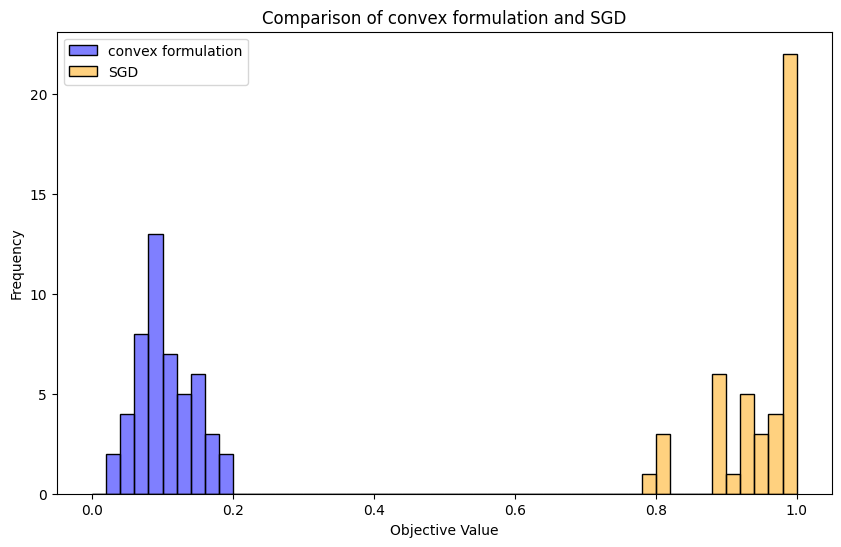

In [ ]:
#Draw histogram for original values
bin = np.linspace(0,1,51)
import seaborn as sns
import numpy as np

data1 = np.array(all_min)
data2 = np.array(all_min_SGD)

# Create figure
plt.figure(figsize=(10, 6))

# Plot both histograms with transparency
sns.histplot(data1, color="blue", label="convex formulation", bins=bin, kde=False, alpha=0.5)
sns.histplot(data2, color="orange", label="SGD",  bins=bin, kde=False, alpha=0.5)



# Add legend and labels
plt.legend()
plt.title("Comparison of convex formulation and SGD")
plt.xlabel("Objective Value")
plt.ylabel("Frequency")

plt.show()

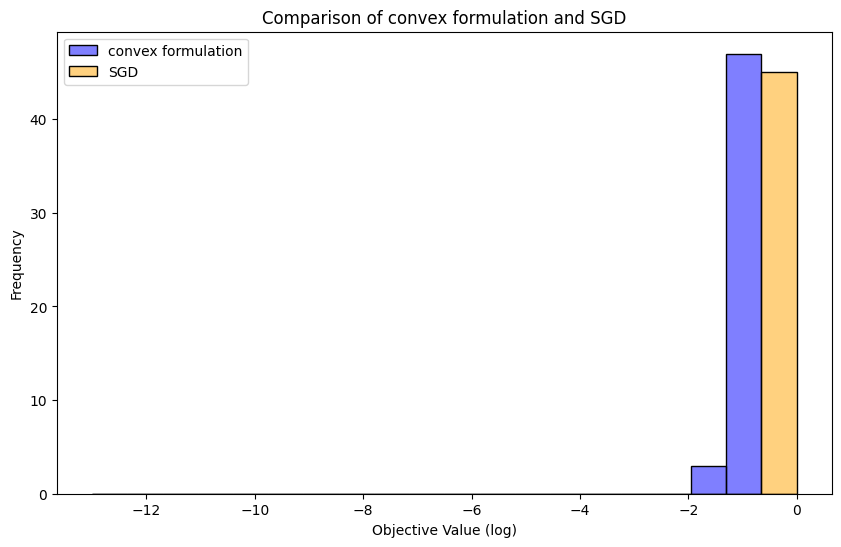

In [ ]:
#Draw histogram for original values
bin = np.linspace(-13,0,21)

log_data1 = np.array(log_all_min)
log_data2 = np.array(log_all_min_SGD)

# Create figure
plt.figure(figsize=(10, 6))

# Plot both histograms with transparency
sns.histplot(log_data1, color="blue", label="convex formulation", bins=bin, kde=False, alpha=0.5)
sns.histplot(log_data2, color="orange", label="SGD",  bins=bin, kde=False, alpha=0.5)



# Add legend and labels
plt.legend()
plt.title("Comparison of convex formulation and SGD")
plt.xlabel("Objective Value (log)")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# Create DataFrame
import pandas as pd

data1 = np.array(all_min)
data2 = np.array(all_min_SGD)


df = pd.DataFrame({
    'Objective Value': np.concatenate([data1, data2]),
    'Methods': ['convex formulation']*len(data1) + ['SGD']*len(data2)
})

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Methods', y='Objective Value', data=df, palette="Set2")

# Add titles and labels
plt.title('Comparison of convex formulation and SGD', fontsize=14)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Objective Values', fontsize=12)

# Add jittered points to show individual observations
sns.stripplot(x='Methods', y='Objective Value', data=df, color='black', alpha=0.5, jitter=True)

plt.show()

In [ ]:
# Create DataFrame
import pandas as pd

data1 = np.array(log_all_min)
data2 = np.array(log_all_min_SGD)


df = pd.DataFrame({
    'Objective Value': np.concatenate([data1, data2]),
    'Methods': ['convex formulation']*len(data1) + ['SGD']*len(data2)
})

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Methods', y='Objective Value', data=df, palette="Set2")

plt.title('Comparison of convex formulation and SGD (log)', fontsize=14)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Objective Values (log base 10)', fontsize=12)


# Add jittered points to show individual observations
sns.stripplot(x='Methods', y='Objective Value', data=df, color='black', alpha=0.5, jitter=True)

plt.show()